### **Salary Comparisons:** Compare average salaries across different industries and job titles to identify where the highest-paying jobs are located.

In [1]:
import pandas as pd

# Load the datasets
postings = pd.read_csv('updated_data\postings.csv')
companies = pd.read_csv('updated_data\company.csv')
company_industries = pd.read_csv('updated_data\company_industries.csv')
company_specialities = pd.read_csv('updated_data\company_specialities.csv')
employee_counts = pd.read_csv('updated_data\employee_counts.csv')
salaries = pd.read_csv('updated_data\salaries.csv')
job_skills = pd.read_csv('updated_data\Job_skills.csv')
job_industries = pd.read_csv('updated_data\job_industries.csv')


In [2]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35564 entries, 0 to 35563
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                35564 non-null  int64  
 1   company_name          35564 non-null  object 
 2   title                 35564 non-null  object 
 3   description           35564 non-null  object 
 4   pay_period            35564 non-null  object 
 5   location              35564 non-null  object 
 6   company_id            35564 non-null  int64  
 7   views                 35564 non-null  int64  
 8   formatted_work_type   35564 non-null  object 
 9   applies               35564 non-null  int64  
 10  original_listed_time  35564 non-null  object 
 11  remote_allowed        35564 non-null  bool   
 12  job_posting_url       35564 non-null  object 
 13  expiry                35564 non-null  object 
 14  listed_time           35564 non-null  object 
 15  work_type          

In [3]:
postings = postings.astype({
    'job_id': 'int32',
    'company_name': 'string',    # Use 'string' for modern text processing (like VARCHAR)
    'title': 'string',
    'description': 'string',
    'pay_period': 'string',
    'location': 'string',
    'company_id': 'int32',
    'views': 'int32',
    'formatted_work_type': 'string',
    'applies': 'int32',
    'job_posting_url': 'string',
    'work_type': 'string',
    'normalized_salary': 'float',
    'zip_code': 'string',
    'fips': 'int32'
})

In [4]:
postings['original_listed_time'] = pd.to_datetime(postings['original_listed_time'], errors='coerce')
postings['expiry'] = pd.to_datetime(postings['expiry'], errors='coerce')

In [5]:
job_industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164808 entries, 0 to 164807
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   job_id       164808 non-null  int64
 1   industry_id  164808 non-null  int64
dtypes: int64(2)
memory usage: 2.5 MB


In [6]:
companies = companies.astype({
    'name': 'string',
    'description': 'string',
    'state': 'string',
    'country': 'string',
    'city': 'string',
    'zip_code': 'string',
    'address': 'string',
    'url': 'string'
})

#### analyze salary based on job title

In [7]:
df_filtered = postings[postings['normalized_salary'] > 0]
df_unique = df_filtered.drop_duplicates(subset=['job_id'], keep='first')

In [8]:
salary_by_title = df_unique.groupby('title')['normalized_salary'].mean().reset_index()
salary_by_title

,title,normalized_salary
0,Public Figure Protection / Executive Protecti...,62500.0
1,Supervisor Clinic Operations,60018.4
2,Data Architect,114138.0
3,AVP Underwriter,160.0
4,Accounts Receivable Specialist,60000.0
...,...,...
24224,z/os Programmer,98800.0
24225,Payroll Tax Accountant,58749.6
24226,​Oracle Services- Cloud SCM Manufacturing- Man...,181900.0
24227,【For External Referral - Talent Spotters】Resea...,170900.0


In [9]:

highest_salary_titles = salary_by_title.sort_values(by='normalized_salary', ascending=False)
highest_salary_titles

,title,normalized_salary
10262,Intellectual Property Associate (246215),5.356000e+08
3318,"Case Manager RN, Pedi Rheumatology",3.624088e+08
2440,Billing Supervisor (246521),2.600000e+08
11949,Manager - Clinical Applications Support - Anci...,2.304234e+08
4074,Cloud Domain Architect,1.907125e+08
...,...,...
16773,"Recreation Aid (Lifeguard), NF-01",1.634000e+01
16774,"Recreation Aid (Trainee-Lifeguard), NF-01",1.634000e+01
23718,Visitor Services Assistant Intern,1.500000e+01
17468,Resident Manager,1.300000e+01


In [10]:
industries = pd.read_csv('updated_data\industries.csv')


In [11]:
industries = industries.astype({
    'industry_name': 'string',  
})

In [12]:
industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    422 non-null    int64 
 1   industry_name  422 non-null    string
dtypes: int64(1), string(1)
memory usage: 6.7 KB


In [13]:
job_industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164808 entries, 0 to 164807
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   job_id       164808 non-null  int64
 1   industry_id  164808 non-null  int64
dtypes: int64(2)
memory usage: 2.5 MB


## analyze salaries based on industry

##### Replacing `job_id` Values in `job_industries.csv`

The reason for replacing the `job_id` values in the `job_industries.csv` file is that the current `job_id` values only match 10 unique values from the `postings.csv` file. This limited matching indicates that the `job_industries` dataset may not be fully utilizing the available job postings, which could lead to a lack of diversity in job listings across different industries.

To enhance the representativeness of the `job_id` values in `job_industries.csv`, we will replace the existing `job_id` values with randomly selected job IDs from the `postings.csv`. This approach ensures that the `job_industries.csv` file reflects a broader range of job postings, improving the relevance and usefulness of the data for analysis and decision-making.


In [14]:
import numpy as np


# Extract the job_id values from postings.csv
job_ids = postings['job_id'].values

# Randomly choose job_id values to match the length of job_industries_df
# Use replacement to fill the job_id column in job_industries_df
random_job_ids = np.random.choice(job_ids, size=len(job_industries), replace=True)

# Replace the job_id values in job_industries.csv with the randomly chosen job_ids
job_industries['job_id'] = random_job_ids

# Save the modified job_industries.csv
job_industries.to_csv('updated_data/modified_job_industries.csv', index=False)

print("job_id values in job_industries.csv have been replaced with random values from postings.csv.")


job_id values in job_industries.csv have been replaced with random values from postings.csv.


In [15]:
modified_job_industries = pd.read_csv('updated_data\modified_job_industries.csv')

In [16]:
merged_df = pd.merge(postings, job_industries, on='job_id')
merged_df.head(3)

,job_id,company_name,title,description,pay_period,location,company_id,views,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,expiry,listed_time,work_type,normalized_salary,zip_code,fips,industry_id
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458,20,Full-time,2,2024-04-17 23:45:08,False,https://www.linkedin.com/jobs/view/921716/?trk...,2024-05-17 23:45:08,2024-04-17 23:45:08,FULL_TIME,38480.0,8540.0,34021,25
1,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458,20,Full-time,2,2024-04-17 23:45:08,False,https://www.linkedin.com/jobs/view/921716/?trk...,2024-05-17 23:45:08,2024-04-17 23:45:08,FULL_TIME,38480.0,8540.0,34021,25
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,YEARLY,"Cincinnati, OH",64896719,8,Full-time,0,2024-04-16 14:26:54,False,https://www.linkedin.com/jobs/view/10998357/?t...,2024-05-16 14:26:54,2024-04-16 14:26:54,FULL_TIME,55000.0,45202.0,39061,14


In [17]:
company_postings = merged_df.groupby(['company_id', 'company_name']).size().reset_index(name='job_posting_count')
company_postings

,company_id,company_name,job_posting_count
0,1009,IBM,132
1,1016,GE HealthCare,35
2,1025,Hewlett Packard Enterprise,53
3,1028,Oracle,250
4,1033,Accenture,50
...,...,...,...
10295,103426165,JPM Financial LLC,7
10296,103432741,Patriot Wings,3
10297,103453650,Souvlaki,9
10298,103456466,Foundation Model Startup,2


In [18]:
full_df = pd.merge(merged_df, industries, on='industry_id')

In [19]:
industry_salary_df = full_df.groupby('industry_name')['normalized_salary'].mean().reset_index()
industry_salary_df

,industry_name,normalized_salary
0,Abrasives and Nonmetallic Minerals Manufacturing,104000.000000
1,Accessible Architecture and Design,153719.822222
2,Accommodation and Food Services,111304.160000
3,Accounting,114682.948758
4,Administration of Justice,116244.052727
...,...,...
384,Wineries,140059.250000
385,Wireless Services,90652.306081
386,Wood Product Manufacturing,101192.218182
387,Writing and Editing,107455.130303


In [20]:
# Sort the DataFrame by normalized_salary in descending order
industry_salary_df = industry_salary_df.sort_values(by='normalized_salary', ascending=False)

# Select the top 10 highest paying industries
top_10_industries = industry_salary_df.head(10)
top_10_industries


,industry_name,normalized_salary
326,Sugar and Confectionery Product Manufacturing,2.149078e+07
278,Renewables & Environment,9.626948e+06
289,Retail Building Materials and Garden Equipment,7.782266e+06
154,Human Resources,1.575172e+06
333,Textile Manufacturing,1.446772e+06
176,Internet Marketplace Platforms,1.301023e+06
198,Market Research,9.763288e+05
101,Engines and Power Transmission Equipment Manuf...,8.744532e+05
26,Automotive,8.731480e+05
360,Wholesale,7.553826e+05


In [21]:
industry_salary_df.head(3)

,industry_name,normalized_salary
326,Sugar and Confectionery Product Manufacturing,2.149078e+07
278,Renewables & Environment,9.626948e+06
289,Retail Building Materials and Garden Equipment,7.782266e+06


C:\Users\My Account\AppData\Local\Temp\ipykernel_5508\474496380.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='normalized_salary', y='industry_name', data=top_10_industries, palette='viridis')


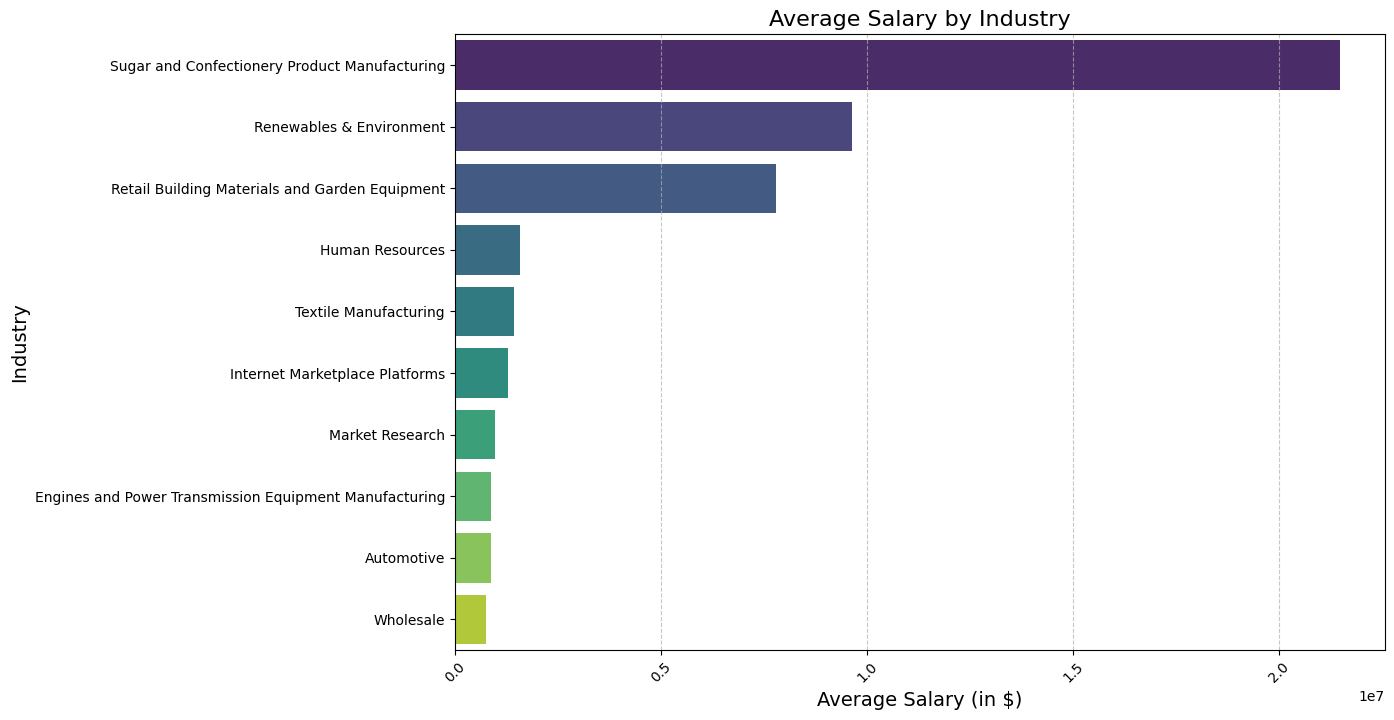

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `highest_paying_industries` is your DataFrame with industry names and average salaries
# Example: highest_paying_industries = pd.DataFrame({'industry_name': ['Tech', 'Finance', 'Healthcare'], 'average_salary': [120000, 115000, 110000]})

plt.figure(figsize=(12, 8))
sns.barplot(x='normalized_salary', y='industry_name', data=top_10_industries, palette='viridis')

plt.title('Average Salary by Industry', fontsize=16)
plt.xlabel('Average Salary (in $)', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [23]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from dash.dash_table import DataTable  # Import DataTable from dash_table

# Sample DataFrame creation for illustration (replace this with your actual data)
# Example structure: industry_salary_df = pd.DataFrame({'industry_name': [...], 'normalized_salary': [...]})

# Assuming industry_salary_df is defined elsewhere
# Get top 10 highest paying industries and sort by salary in descending order
top_10_industries = industry_salary_df.nlargest(10, 'normalized_salary')

category_order = top_10_industries['industry_name'].tolist()

# Create the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Average Salary by Industry", style={'textAlign': 'center', 'color': '#333', 'fontFamily': 'Arial'}),
    dcc.Graph(
        id='top-industry-bar-graph',
        figure=px.bar(
            top_10_industries,
            x='normalized_salary',
            y='industry_name',
            orientation='h',
            title='Top 10 Highest Paying Industries',
            labels={'normalized_salary': 'Average Salary (in $)', 'industry_name': 'Industry'},
            text='normalized_salary',
            color='normalized_salary',
            color_continuous_scale=px.colors.sequential.Viridis,
            category_orders={'industry_name': category_order}  # Specify the order of categories
        ).update_traces(
            texttemplate='%{text:.2f}',  # Format the text on the bars
            textposition='outside',
            marker=dict(line=dict(width=2, color='DarkSlateGrey')),  # Add border around bars
        ).update_layout(
            title_x=0.5,  # Center title
            title_font=dict(size=24, color='darkblue'),  # Title font
            margin=dict(l=40, r=40, t=40, b=40),  # Set margins
            plot_bgcolor='rgba(240, 240, 240, 0.95)',  # Light background
            paper_bgcolor='rgba(255, 255, 255, 0.9)',  # Paper background
            font=dict(size=14, color='black'),  # Font for all text
            xaxis_title='Average Salary (in $)',
            yaxis_title='Industry',
            xaxis=dict(showgrid=True, gridcolor='LightGrey'),  # Add gridlines
            yaxis=dict(showgrid=False),  # Disable gridlines on y-axis
            hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial')  # Hover label styling
        )
    ),
    html.H2("All Industries and Their Salaries", style={'textAlign': 'center', 'color': 'blue', 'fontFamily': 'Arial'}),
    dcc.Loading(
        id="loading",
        type="default",
        children=[
            html.Div(
                DataTable(  # Use DataTable from dash_table
                    id='industry-table',
                    columns=[
                        {"name": "Industry", "id": "industry_name"},  # Changed to 'Industry'
                        {"name": "Average Salary", "id": "normalized_salary"},  # Changed to 'Average Salary'
                    ],
                    data=industry_salary_df.to_dict('records'),
                    page_size=15,  # Number of rows per page
                    style_table={'overflowY': 'auto', 'height': '400px'},  # Set fixed height and scroll
                    style_cell={'textAlign': 'left', 'padding': '10px', 'border': '1px solid #e1e1e1'},
                    style_header={'backgroundColor': 'lightgrey', 'fontWeight': 'bold', 'border': '1px solid #e1e1e1'},
                    style_data={'whiteSpace': 'normal', 'height': 'auto', 'border': '1px solid #e1e1e1'},  # Allow auto height for rows
                ),
                style={'overflow': 'auto'}
            )
        ]
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [31]:
import plotly.express as px

# Example DataFrame with industry names and average salaries
highest_paying_industries = pd.DataFrame({
    'industry_name': ['Tech', 'Finance', 'Healthcare', 'Education', 'Construction'],
    'average_salary': [120000, 115000, 110000, 90000, 80000],
    'num_jobs': [1500, 1200, 800, 600, 400]  # Additional information for hover
})

# Create an interactive horizontal bar graph with enhanced styling
fig = px.bar(
    industry_salary_df,
    x='normalized_salary',
    y='industry_name',
    orientation='h',
    title='Average Salary by Industry',
    labels={'normalized_salary': 'Average Salary (in $)', 'industry_name': 'Industry'},
    text='normalized_salary',
    hover_data={'normalized_salary': True, 'num_jobs': True},
    color='normalized_salary',  # Color by average salary
    color_continuous_scale=px.colors.sequential.Viridis  # Color scale
)

# Customize hover tooltip
fig.update_traces(hovertemplate='<b>%{y}</b><br>Average Salary: $%{x:,.2f}<br>Number of Jobs: %{customdata[0]}<extra></extra>',
                  texttemplate='%{text:,.2f}', textposition='outside', 
                  marker=dict(line=dict(width=2, color='black')),  # Add outline to bars
                  opacity=0.85)  # Slightly transparent bars for depth

# Adding a shadow effect using custom CSS style for aesthetics
fig.update_layout(
    title_font=dict(size=20, color='darkblue'),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    font=dict(size=12, color='black'),
    plot_bgcolor='rgba(255, 255, 255, 0)',  # Transparent background for the plot
    margin=dict(l=20, r=20, t=40, b=20),  # Adjust margins for better spacing
)

# Show the interactive figure
fig.show()


ValueError: Value of 'hover_data_1' is not the name of a column in 'data_frame'. Expected one of ['industry_name', 'normalized_salary'] but received: num_jobs